# Demonstrating Multi-attribute and Order-indexes for Data Discovery

In [1]:
from datalake_indexes_demo import DatalakeIndexesDemo

demo = DatalakeIndexesDemo("/Users/jannisbecktepe/Developer/db_config.json",
                           "cafe_gittables2")

                                         movie_title duration  \
0                                            Avatar       178   
1          Pirates of the Caribbean: At World's End       169   
2                                           Spectre       148   
3                             The Dark Knight Rises       164   
4  Star Wars: Episode VII - The Force Awakens    ...      NaN   

       director_name                           genres imdb_score  
0      James Cameron  Action|Adventure|Fantasy|Sci-Fi        7.9  
1     Gore Verbinski         Action|Adventure|Fantasy        7.1  
2         Sam Mendes        Action|Adventure|Thriller        6.8  
3  Christopher Nolan                  Action|Thriller        8.5  
4        Doug Walker                      Documentary        7.1  


## 1) Input Preparation
### Read input dataset

In [12]:
demo.read_input("../datasets/movie.csv")

                                         movie_title duration  \
0                                            Avatar       178   
1          Pirates of the Caribbean: At World's End       169   
2                                           Spectre       148   
3                             The Dark Knight Rises       164   
4  Star Wars: Episode VII - The Force Awakens    ...      NaN   

       director_name                           genres imdb_score  
0      James Cameron  Action|Adventure|Fantasy|Sci-Fi        7.9  
1     Gore Verbinski         Action|Adventure|Fantasy        7.1  
2         Sam Mendes        Action|Adventure|Thriller        6.8  
3  Christopher Nolan                  Action|Thriller        8.5  
4        Doug Walker                      Documentary        7.1  


### Select query columns

In [13]:
demo.set_query_columns(["movie_title", "director_name"])

['movie_title', 'director_name']
                                         movie_title duration  \
0                                            Avatar       178   
1          Pirates of the Caribbean: At World's End       169   
2                                           Spectre       148   
3                             The Dark Knight Rises       164   
4  Star Wars: Episode VII - The Force Awakens    ...      NaN   

       director_name                           genres imdb_score  
0      James Cameron  Action|Adventure|Fantasy|Sci-Fi        7.9  
1     Gore Verbinski         Action|Adventure|Fantasy        7.1  
2         Sam Mendes        Action|Adventure|Thriller        6.8  
3  Christopher Nolan                  Action|Thriller        8.5  
4        Doug Walker                      Documentary        7.1  


### Select target column

In [3]:
demo.set_target_column("imdb_score")

imdb_score
                                         movie_title duration  \
0                                            Avatar       178   
1          Pirates of the Caribbean: At World's End       169   
2                                           Spectre       148   
3                             The Dark Knight Rises       164   
4  Star Wars: Episode VII - The Force Awakens    ...      NaN   

       director_name                           genres imdb_score  
0      James Cameron  Action|Adventure|Fantasy|Sci-Fi        7.9  
1     Gore Verbinski         Action|Adventure|Fantasy        7.1  
2         Sam Mendes        Action|Adventure|Thriller        6.8  
3  Christopher Nolan                  Action|Thriller        8.5  
4        Doug Walker                      Documentary        7.1  


## 2) Joinability Discovery

### Find top-10 joinable tables using Super Key Index and MATE Algorithm

In [4]:
demo.joinability_discovery()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 419.17it/s]


MATE runtime:     1.10s

Hash-based filtered rows: 11765
Hash-based approved rows: 576
Matching rows:            514
FP rows:                  62


### Plot joinability score for joinable tables

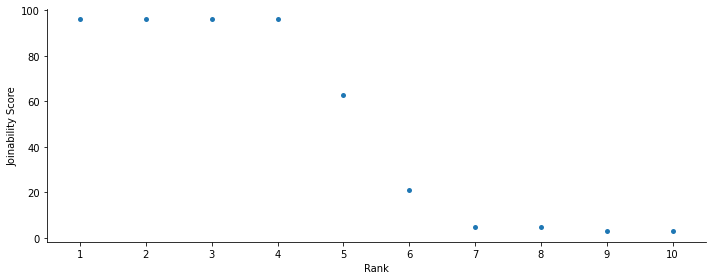

In [5]:
demo.plot_joinability_scores()

### Display joinable table with rank #1

In [6]:
demo.display_joinable_table(1)

Score: 96 
Table ID: 230999 
Joinable columns: 11_1 
#rows: 149 
#columns: 28 
   color      director_name num_critic_for_reviews duration  \
0  color      james cameron                  723 0    178 0   
1  color     gore verbinski                  302 0    169 0   
2  color         sam mendes                  602 0    148 0   
3  color  christopher nolan                  813 0    164 0   
4   none        doug walker                    nan      nan   

  director_facebook_likes actor_3_facebook_likes      actor_2_name  \
0                       0                  855 0  joel david moore   
1                     563                 1000 0     orlando bloom   
2                       0                  161 0      rory kinnear   
3                   22000                23000 0    christian bale   
4                     131                    nan        rob walker   

  actor_1_facebook_likes        gross                           genres  ...  \
0                   1000  760505847 0  act

# 3) Duplicate Detection using XASH
## Discover duplicate tables and their relationship

In [7]:
demo.duplicate_detection().show("nb.html")

## Analyze XASH alternations

In [8]:
demo.analyze_XASH_alternations()

# 4) Correlation Calculation
## Obtain top-10 correlating features using Order Index and COCOA Algorithm

In [9]:
# 4) Correlation Calculation
## Obtain top-10 correlating features using Order Index and COCOA Algorithmdemo.correlation_calculation()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 293.85it/s]

Total runtime: 0.15s
Preparation runtime: 0.11s
Correlation calculation runtime: 0.04s

Evaluated features: 238
Max. correlation coefficient: 0.6349
Min. correlation coefficient: 0.0000
{'230999_num_voted_users': 0.6348958306242422, '278123_num_voted_users': 0.6348958306242422, '21812_num_voted_users': 0.6348958306242422}
{'230999_num_voted_users': array([1.        , 0.65772433]), '278123_num_voted_users': array([1.        , 0.65825108]), '21812_num_voted_users': array([1.        , 0.65936236])}
                                           movie_title duration  \
0                                              Avatar       178   
1            Pirates of the Caribbean: At World's End       169   
2                                             Spectre       148   
3                               The Dark Knight Rises       164   
4    Star Wars: Episode VII - The Force Awakens    ...      NaN   
..                                                 ...      ...   
102                           

## Inspect correlation between input and top-correlating features

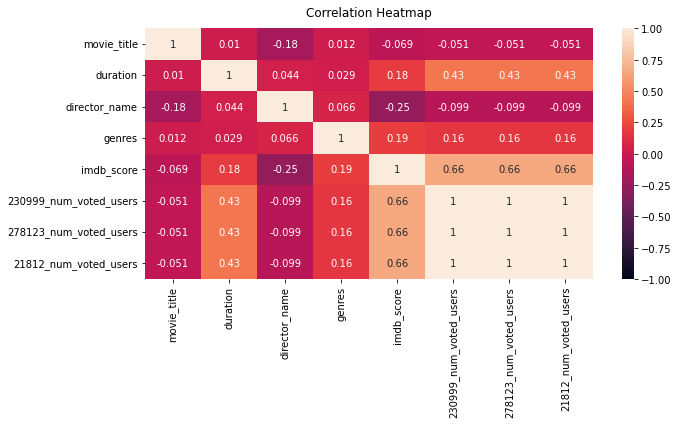

In [10]:
demo.plot_correlation()